# 案例2: 构建自己的多层感知机: MNIST 手写数字识别

### 本案例要求如下
- #### 实现SGD优化器 (`./optimizer.py`)
- #### 实现全连接层FCLayer前向和后向计算 (`layers/fc_layer.py`)
- #### 实现激活层SigmoidLayer前向和后向计算 (`layers/sigmoid_layer.py`)
- #### 实现激活层ReLULayer前向和后向计算 (`layers/relu_layer.py`)
- #### 实现损失层EuclideanLossLayer (`criterion/euclidean_loss.py`)
- #### 实现损失层SoftmaxCrossEntropyLossLayer (`criterion/softmax_cross_entropy.py`)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_eager_execution()
from network import Network
from solver import train, test
from plot import plot_loss_and_acc

## 读入MNIST数据集

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
def decode_image(image):
    # 归一化处理
    image = tf.cast(image, tf.float32)
    image = tf.reshape(image, [784])
    image = image / 255.0
    image = image - tf.reduce_mean(image)
    return image

def decode_label(label):
    # 将标签变为one-hot编码
    return tf.one_hot(label, depth=10)

In [4]:
# 数据预处理
x_train = tf.data.Dataset.from_tensor_slices(x_train).map(decode_image)
y_train = tf.data.Dataset.from_tensor_slices(y_train).map(decode_label)
data_train = tf.data.Dataset.zip((x_train, y_train))

x_test = tf.data.Dataset.from_tensor_slices(x_test).map(decode_image)
y_test = tf.data.Dataset.from_tensor_slices(y_test).map(decode_label)
data_test = tf.data.Dataset.zip((x_test, y_test))

## 超参数设置

In [5]:
batch_size = 100
max_epoch = 20
init_std = 0.01

learning_rate_SGD = 0.001
weight_decay = 0.1

disp_freq = 50

## 1. 使用欧式距离损失训练多层感知机(MLP with Euclidean Loss)
第一部分将使用欧式距离损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.
### TODO
执行以下代码之前，请完成 **./optimizer.py** 和 **criterion/euclidean_loss.py**.

In [6]:
from criterion import EuclideanLossLayer
from optimizer import SGD

criterion = EuclideanLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 1.1 使用欧式距离损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和Sigmoid激活函数.

### TODO
执行以下代码之前，请完成 **layers/fc_layer.py** 和 **layers/sigmoid_layer.py**.

In [7]:
from layers import FCLayer, SigmoidLayer

sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128)) # input 
sigmoidMLP.add(SigmoidLayer()) # 激活
sigmoidMLP.add(FCLayer(128, 10)) # output

In [8]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.


2022-09-21 16:43:21.897513: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-21 16:43:21.897982: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.
2022-09-21 16:43:22.328001: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 12. Tune using inter_op_parallelism_threads for best performance.


Epoch [0][20]	 Batch [0][550]	 Training Loss 4.5435	 Accuracy 0.0400
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.4105	 Accuracy 0.0698
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.8454	 Accuracy 0.0897
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.6404	 Accuracy 0.1047
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.5273	 Accuracy 0.1166
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.4595	 Accuracy 0.1250
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.4084	 Accuracy 0.1344
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.3703	 Accuracy 0.1431
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.3396	 Accuracy 0.1533
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.3148	 Accuracy 0.1625
Epoch [0][20]	 Batch [500][550]	 Training Loss 1.2934	 Accuracy 0.1707

Epoch [0]	 Average training loss 1.2738	 Average training accuracy 0.1790
Epoch [0]	 Average validation loss 1.0688	 Average validation accuracy 0.2876

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.0413	 Accuracy 0.2900

In [9]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7802.



## 1.2 使用欧式距离损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用欧式距离损失和ReLU激活函数.

### TODO
执行以下代码之前，请完成 **layers/relu_layer.py**.

In [10]:
from layers import ReLULayer

reluMLP = Network()
# 使用FCLayer和ReLULayer构建多层感知机
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [11]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 4.1422	 Accuracy 0.0400
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.4159	 Accuracy 0.1051
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.1709	 Accuracy 0.1231
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.0678	 Accuracy 0.1399
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.9834	 Accuracy 0.1531
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.9171	 Accuracy 0.1618
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.8666	 Accuracy 0.1735
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.8242	 Accuracy 0.1837
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.7885	 Accuracy 0.1914
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.7576	 Accuracy 0.2001
Epoch [0][20]	 Batch [500][550]	 Training Loss 1.7310	 Accuracy 0.2086

Epoch [0]	 Average training loss 1.7053	 Average training accuracy 0.2169
Epoch [0]	 Average validation loss 1.4899	 Average validation accuracy 0.3798

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.6292	 Accuracy 0.4900

In [12]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.6614.



## 绘制曲线

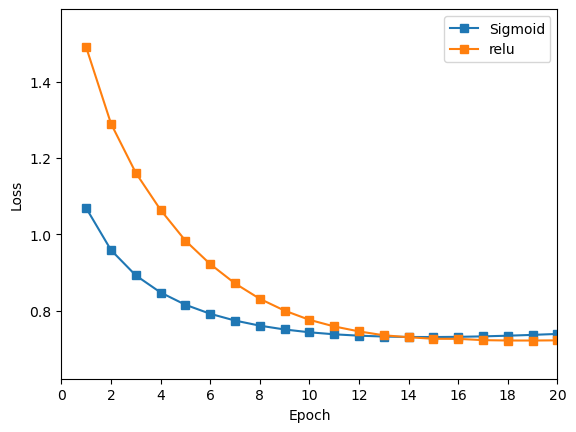

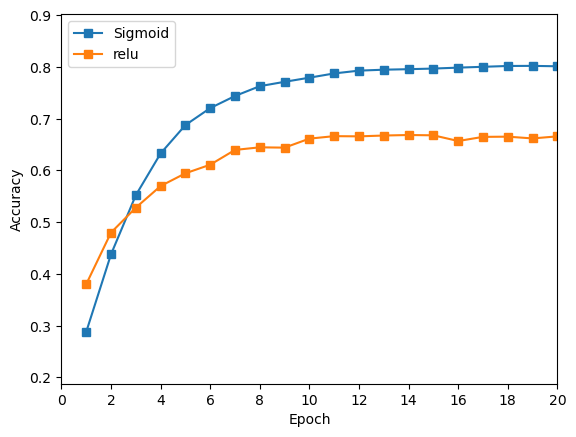

In [13]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 2. 使用Softmax交叉熵损失训练多层感知机(MLP with Softmax Cross-Entropy Loss)
第二部分将使用Softmax交叉熵损失训练多层感知机. 
分别使用**Sigmoid**激活函数和**ReLU**激活函数.

### TODO
执行以下代码之前，请完成 **criterion/softmax_cross_entropy_loss.py**.

In [14]:
from criterion import SoftmaxCrossEntropyLossLayer

criterion = SoftmaxCrossEntropyLossLayer()

sgd = SGD(learning_rate_SGD, weight_decay)

## 2.1 使用Softmax交叉熵损失和Sigmoid激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和Sigmoid激活函数.

In [15]:
sigmoidMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP.add(FCLayer(784, 128))
sigmoidMLP.add(SigmoidLayer())
sigmoidMLP.add(FCLayer(128, 10))

### 训练

In [16]:
sigmoidMLP, sigmoid_loss, sigmoid_acc = train(sigmoidMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.5800	 Accuracy 0.1300
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5725	 Accuracy 0.1051
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.5170	 Accuracy 0.1084
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.4786	 Accuracy 0.1105
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.4491	 Accuracy 0.1108
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.4228	 Accuracy 0.1144
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.4013	 Accuracy 0.1183
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.3833	 Accuracy 0.1211
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.3668	 Accuracy 0.1268
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.3526	 Accuracy 0.1331
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.3398	 Accuracy 0.1395

Epoch [0]	 Average training loss 2.3279	 Average training accuracy 0.1483
Epoch [0]	 Average validation loss 2.1971	 Average validation accuracy 0.2490

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.1748	 Accuracy 0.2100

### 测试

In [17]:
test(sigmoidMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.7001.



## 2.2 使用Softmax交叉熵损失和ReLU激活函数训练多层感知机
训练带有一个隐含层且神经元个数为128的多层感知机，使用Softmax交叉熵损失和ReLU激活函数.

In [18]:
reluMLP = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
reluMLP.add(FCLayer(784, 128))
reluMLP.add(ReLULayer())
reluMLP.add(FCLayer(128, 10))

In [19]:
reluMLP, relu_loss, relu_acc = train(reluMLP, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.2846	 Accuracy 0.1900
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.4472	 Accuracy 0.0920
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.4036	 Accuracy 0.1038
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.3667	 Accuracy 0.1197
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.3362	 Accuracy 0.1336
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.3040	 Accuracy 0.1517
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.2759	 Accuracy 0.1677
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.2501	 Accuracy 0.1854
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.2214	 Accuracy 0.2030
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.1945	 Accuracy 0.2200
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.1704	 Accuracy 0.2350

Epoch [0]	 Average training loss 2.1434	 Average training accuracy 0.2525
Epoch [0]	 Average validation loss 1.8575	 Average validation accuracy 0.4336

Epoch [1][20]	 Batch [0][550]	 Training Loss 1.6901	 Accuracy 0.5300

In [20]:
test(reluMLP, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8630.



## 绘制曲线

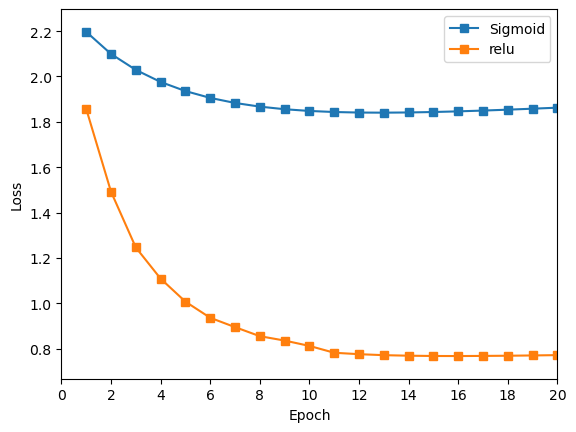

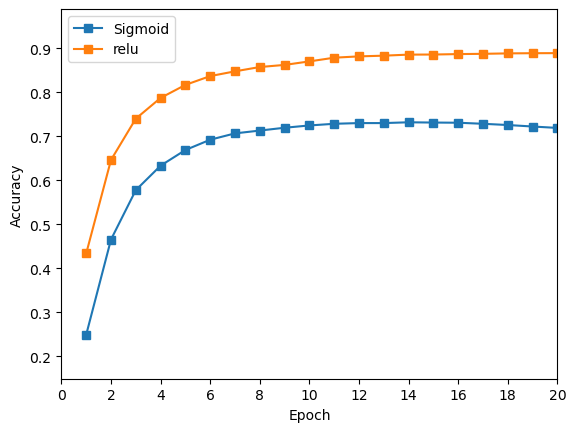

In [21]:
plot_loss_and_acc({'Sigmoid': [sigmoid_loss, sigmoid_acc],
                   'relu': [relu_loss, relu_acc]})

## 具有两层隐含层的多层感知机

接下来，根据案例要求，还需要完成**构造具有两个隐含层的多层感知机，自行选取合适的激活函数和损失函数，与只有一个隐含层的结果相比较**.

注意: 请在下方插入新的代码块，不要直接修改上面的代码.

In [22]:
from criterion import EuclideanLossLayer
from optimizer import SGD
from criterion import SoftmaxCrossEntropyLossLayer
from layers import FCLayer
from layers import ReLULayer
from layers import SigmoidLayer
criterion = SoftmaxCrossEntropyLossLayer()
sgd = SGD(learning_rate_SGD, weight_decay)
reluMLP2 = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
reluMLP2.add(FCLayer(784, 128))
reluMLP2.add(ReLULayer())
reluMLP2.add(FCLayer(128, 64))
reluMLP2.add(ReLULayer())
reluMLP2.add(FCLayer(64, 10))

In [23]:
reluMLP2, relu_loss2, relu_acc2 = train(reluMLP2, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.3906	 Accuracy 0.0800
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.4004	 Accuracy 0.0973
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.3763	 Accuracy 0.1071
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.3550	 Accuracy 0.1136
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.3357	 Accuracy 0.1221
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.3154	 Accuracy 0.1310
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.3004	 Accuracy 0.1389
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.2840	 Accuracy 0.1485
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.2711	 Accuracy 0.1533
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.2549	 Accuracy 0.1620
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.2405	 Accuracy 0.1695

Epoch [0]	 Average training loss 2.2282	 Average training accuracy 0.1764
Epoch [0]	 Average validation loss 2.0089	 Average validation accuracy 0.3038

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.1519	 Accuracy 0.2400

In [24]:
test(reluMLP2, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.8346.



In [25]:
sigmoidMLP2 = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP2.add(FCLayer(784, 128))
sigmoidMLP2.add(SigmoidLayer())
sigmoidMLP2.add(FCLayer(128, 64))
sigmoidMLP2.add(SigmoidLayer())
sigmoidMLP2.add(FCLayer(64, 10))

In [26]:
sigmoidMLP2, sigmoid_loss2, sigmoid_acc2 = train(sigmoidMLP2, criterion, sgd, data_train, max_epoch, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 3.0949	 Accuracy 0.1100
Epoch [0][20]	 Batch [50][550]	 Training Loss 3.0384	 Accuracy 0.1027
Epoch [0][20]	 Batch [100][550]	 Training Loss 2.9719	 Accuracy 0.0933
Epoch [0][20]	 Batch [150][550]	 Training Loss 2.8945	 Accuracy 0.0927
Epoch [0][20]	 Batch [200][550]	 Training Loss 2.8311	 Accuracy 0.0910
Epoch [0][20]	 Batch [250][550]	 Training Loss 2.7833	 Accuracy 0.0899
Epoch [0][20]	 Batch [300][550]	 Training Loss 2.7418	 Accuracy 0.0895
Epoch [0][20]	 Batch [350][550]	 Training Loss 2.7041	 Accuracy 0.0897
Epoch [0][20]	 Batch [400][550]	 Training Loss 2.6725	 Accuracy 0.0914
Epoch [0][20]	 Batch [450][550]	 Training Loss 2.6450	 Accuracy 0.0932
Epoch [0][20]	 Batch [500][550]	 Training Loss 2.6204	 Accuracy 0.0950

Epoch [0]	 Average training loss 2.5985	 Average training accuracy 0.0965
Epoch [0]	 Average validation loss 2.3643	 Average validation accuracy 0.1224

Epoch [1][20]	 Batch [0][550]	 Training Loss 2.3322	 Accuracy 0.1200

In [27]:
test(sigmoidMLP2, criterion, data_test, batch_size, disp_freq)

Testing...
The test accuracy is 0.1135.



In [28]:
from criterion import EuclideanLossLayer
from optimizer import SGD
from criterion import SoftmaxCrossEntropyLossLayer
from layers import FCLayer
from layers import ReLULayer
from layers import SigmoidLayer
criterion3 = EuclideanLossLayer()
sgd3 = SGD(learning_rate_SGD, weight_decay)
reluMLP3 = Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
reluMLP3.add(FCLayer(784, 128))
reluMLP3.add(ReLULayer())
reluMLP3.add(FCLayer(128, 64))
reluMLP3.add(ReLULayer())
reluMLP3.add(FCLayer(64, 10))
reluMLP3, relu_loss3, relu_acc3 = train(reluMLP3, criterion3, sgd3, data_train, max_epoch, batch_size, disp_freq)
test(reluMLP3, criterion3, data_test, batch_size, disp_freq)

Epoch [0][20]	 Batch [0][550]	 Training Loss 2.4379	 Accuracy 0.0400
Epoch [0][20]	 Batch [50][550]	 Training Loss 1.6961	 Accuracy 0.0898
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.5261	 Accuracy 0.0887
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.4237	 Accuracy 0.0913
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.3943	 Accuracy 0.0966
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.3411	 Accuracy 0.0975
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.3191	 Accuracy 0.1009
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.3037	 Accuracy 0.1032
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.2834	 Accuracy 0.1057
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.2781	 Accuracy 0.1095
Epoch [0][20]	 Batch [500][550]	 Training Loss 1.2681	 Accuracy 0.1125

Epoch [0]	 Average training loss 1.2660	 Average training accuracy 0.1155
Epoch [0]	 Average validation loss 1.2003	 Average validation accuracy 0.1556

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.9759	 Accuracy 0.1000

In [29]:
sigmoidMLP3= Network()
# 使用FCLayer和SigmoidLayer构建多层感知机
# 128为隐含层的神经元数目
sigmoidMLP3.add(FCLayer(784, 128))
sigmoidMLP3.add(SigmoidLayer())
sigmoidMLP3.add(FCLayer(128, 64))
sigmoidMLP3.add(SigmoidLayer())
sigmoidMLP3.add(FCLayer(64, 10))
sigmoidMLP3, sigmoid_loss3, sigmoid_acc3 = train(sigmoidMLP3, criterion3, sgd3, data_train, max_epoch, batch_size, disp_freq)
test(sigmoidMLP3, criterion3, data_test, batch_size, disp_freq)


Epoch [0][20]	 Batch [0][550]	 Training Loss 4.1755	 Accuracy 0.0500
Epoch [0][20]	 Batch [50][550]	 Training Loss 2.5477	 Accuracy 0.0863
Epoch [0][20]	 Batch [100][550]	 Training Loss 1.8888	 Accuracy 0.0853
Epoch [0][20]	 Batch [150][550]	 Training Loss 1.5804	 Accuracy 0.0883
Epoch [0][20]	 Batch [200][550]	 Training Loss 1.4162	 Accuracy 0.0952
Epoch [0][20]	 Batch [250][550]	 Training Loss 1.3151	 Accuracy 0.1003
Epoch [0][20]	 Batch [300][550]	 Training Loss 1.2470	 Accuracy 0.1046
Epoch [0][20]	 Batch [350][550]	 Training Loss 1.1980	 Accuracy 0.1092
Epoch [0][20]	 Batch [400][550]	 Training Loss 1.1606	 Accuracy 0.1141
Epoch [0][20]	 Batch [450][550]	 Training Loss 1.1311	 Accuracy 0.1200
Epoch [0][20]	 Batch [500][550]	 Training Loss 1.1077	 Accuracy 0.1232

Epoch [0]	 Average training loss 1.0885	 Average training accuracy 0.1266
Epoch [0]	 Average validation loss 0.8883	 Average validation accuracy 0.1742

Epoch [1][20]	 Batch [0][550]	 Training Loss 0.8786	 Accuracy 0.2000

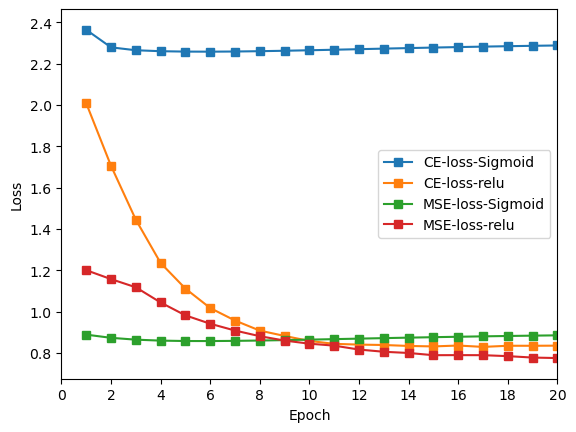

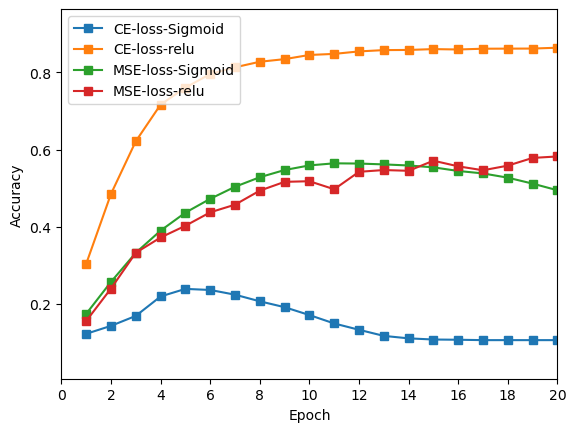

In [30]:
plot_loss_and_acc({'CE-loss-Sigmoid': [sigmoid_loss2, sigmoid_acc2],
                   'CE-loss-relu': [relu_loss2, relu_acc2],
                   'MSE-loss-Sigmoid': [sigmoid_loss3, sigmoid_acc3],
                   'MSE-loss-relu': [relu_loss3, relu_acc3]})

In [7]:
import numpy as np

x1 = np.arange(9.0).reshape((3, 3))
print(x1)
x2 = np.arange(9.0).reshape((3, 3))
print (x2)
x3 = np.subtract(x1, x2)
print (x3)
print(x3.shape)


[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
(3, 3)
